In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

### Problem 1: The iris dataset

1. do a train-test split of the data
1. do EDA and pairplot on the training data
1. Make a linear regression model from the training data with target of `sepal_length` based on the other four variables
    * Are all of the coefficients significant at the 10% level?
1. Make a linear regression model from the training data with target of `petal_width` based on the other four variables
1. Compute the mean_squared_error and r2_score using the *test data* for your two models above.

In [5]:
filename = 'iris.csv'
path = os.path.join('..', 'data')
filepath = os.path.join(path, filename)
iris = pd.read_csv(filepath)
iris.head()  #need to get rid of unamed column, which is an old index column

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [7]:
iris = iris.drop('Unnamed: 0', axis='columns')

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
def statmodels_split(df, stratify=None, **kwargs):
    """
    Inputs
        df: pandas dataframe.
            if stratify is None, target column MUST be the first column in the dataframe
        
        stratify: target, as pandas Series or None
    
    Returns: 
        Tuple of dataframes (df_train, df_test) 
    """

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [19]:
train, test = statmodels_split(iris, test_size=0.2, stratify=iris['species'])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 112 to 77
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 74 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  30 non-null     float64
 1   sepal_width   30 non-null     float64
 2   petal_length  30 non-null     float64
 3   petal_width   30 non-null     float64
 4   species       30 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


In [22]:
train['species'].value_counts()

setosa        40
versicolor    40
virginica     40
Name: species, dtype: int64

In [23]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,120.000000,120.000000,120.000000,120.000000
mean,5.830833,3.046667,3.765833,1.202500
std,0.840847,0.440956,1.760037,0.770732
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


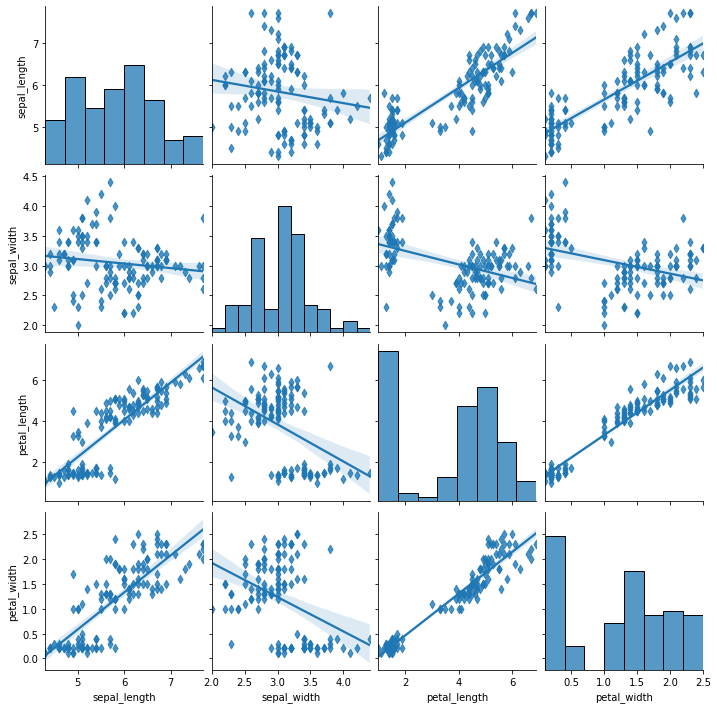

In [26]:
sns.pairplot(train, kind='reg', markers='d')

In [27]:
train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [28]:
formula = 'sepal_length ~ sepal_width + petal_length + petal_width + C(species)'
iris_model_1 = smf.ols(formula=formula, data=train).fit()

In [29]:
iris_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     139.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           6.34e-47
Time:                        13:59:35   Log-Likelihood:                -31.111
No. Observations:                 120   AIC:                             74.22
Df Residuals:                     114   BIC:                             90.95
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.2310      0.324      6.887      0.000       1.589       2.873
C(species)[T.versicolor]    -0.8570      0.277     -3.092      0.003      -1.406      -0.308
C(species)[T.virginica]     -1.1722      0.383     -3.058      0.003      -1.932      -0.413
sepal_width                  0.4597      0.099      4.656      0.000       0.264       0.655
petal_length                 0.8365      0.078     10.758      0.000       0.682       0.991
petal_width                 -0.2282      0.180     -1.270      0.207      -0.584       0.128
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.956
Skew:                          -0.085   Prob(JB):                        0.620
Kurtosis:                       2.597   Cond. No.                         92.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Petal_width is NOT significant at the 10% level in this model

In [30]:
predictions = iris_model_1.predict(test)

In [31]:
predictions

74     6.007446
80     5.404993
19     5.163984
43     5.041286
61     5.924121
69     5.534611
21     5.095200
128    6.551181
109    7.245893
1      4.735428
25     4.902735
35     4.660053
131    7.702876
16     5.019824
99     5.794175
7      5.002942
136    6.758516
78     6.129115
125    7.138110
89     5.572627
36     4.881601
64     5.421875
108    6.649048
133    6.269828
50     6.457135
104    6.787599
103    6.665602
79     5.268782
49     4.873324
127    6.125996
dtype: float64

In [32]:
r2_score(test['sepal_length'], predictions)

0.8934948464159186

In [33]:
mean_squared_error(test['sepal_length'], predictions)

0.06368534828089918

In [34]:
iris_model_2 = smf.ols(formula='petal_width ~ sepal_length + petal_length + sepal_width + C(species)', data=train).fit()

In [35]:
iris_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     487.1
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           3.70e-75
Time:                        14:11:55   Log-Likelihood:                 47.931
No. Observations:                 120   AIC:                            -83.86
Df Residuals:                     114   BIC:                            -67.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.5225      0.193     -2.702      0.008      -0.906      -0.139
C(species)[T.versicolor]     0.6815      0.135      5.048      0.000       0.414       0.949
C(species)[T.virginica]      1.1150      0.178      6.263      0.000       0.762       1.468
sepal_length                -0.0611      0.048     -1.270      0.207      -0.156       0.034
petal_length                 0.2190      0.053      4.107      0.000       0.113       0.325
sepal_width                  0.2159      0.052      4.157      0.000       0.113       0.319
==============================================================================
Omnibus:                        8.168   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               12.945
Skew:                          -0.267   Prob(JB):                      0.00155
Kurtosis:                       4.518   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sepal_length is NOT significant at the 10% level in this model

In [22]:
iris_model_2.params

Intercept                  -0.336978
C(species)[T.versicolor]    0.537977
C(species)[T.virginica]     0.905429
sepal_length               -0.100991
petal_length                0.272411
sepal_width                 0.202971
dtype: float64

In [36]:
predictions_2 = iris_model_2.predict(test)

In [37]:
r2_score(test['petal_width'], predictions_2)

0.944106478596047

In [38]:
mean_squared_error(test['petal_width'], predictions_2)

0.029576367370465054

### Problem 2: The penguin dataset DATA

1. do a train-test split of the data
1. do EDA and pairplot on the training data
1. Make a linear regression model from the training data with target of `flipper_length` based on the other featurees. Note that some of the features are categorical.
    * Are NaNs allowed in statsmodels objects?
    * Are all of the coefficients significant at the 10% level?
1. Compute the mean_squared_error and r2_score using the *test data* for your two models above.

In [41]:
filename = 'penguins.csv'
path = os.path.join('..', 'data')
filepath = os.path.join(path, filename)

penguins = pd.read_csv(filepath)
penguins = penguins.drop('Unnamed: 0', axis='columns')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [43]:
penguins.dropna(inplace=True) #get rid of NA rows prior to split

In [44]:
train, test = statmodels_split(penguins, test_size=0.2, stratify=penguins['species'])

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 284 to 311
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            266 non-null    object 
 1   island             266 non-null    object 
 2   bill_length_mm     266 non-null    float64
 3   bill_depth_mm      266 non-null    float64
 4   flipper_length_mm  266 non-null    float64
 5   body_mass_g        266 non-null    float64
 6   sex                266 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.6+ KB


In [46]:
train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,266.000000,266.000000,266.000000,266.000000
mean,43.816917,17.209774,200.398496,4197.368421
std,5.505165,1.941789,14.125550,807.422893
min,32.100000,13.200000,172.000000,2850.000000
25%,39.225000,15.625000,190.000000,3556.250000
50%,43.700000,17.350000,197.000000,4000.000000
75%,48.500000,18.700000,212.750000,4750.000000
max,59.600000,21.200000,231.000000,6300.000000


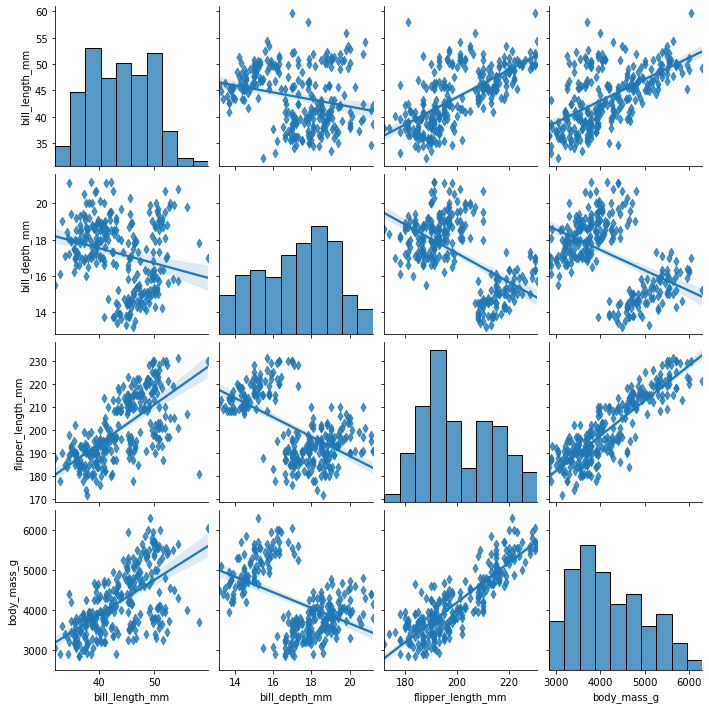

In [47]:
sns.pairplot(train, kind='reg', markers='d')

#### There seems to be two distinct groups when looking at bill_depth vs body_mass and bill_depth

In [34]:
ptrain['sbin'] = np.where(ptrain['sex']=='MALE', 1, 0) #binarize groups, we'll start with M/F

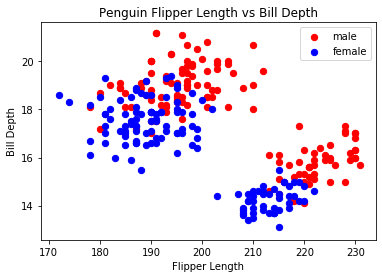

In [63]:
fig, ax = plt.subplots()

def make_insects_scatter_plot(ax, col, l1, l2):
    sex_boolean = ptrain[col].astype(bool)
    ax.scatter(ptrain.flipper_length_mm[sex_boolean], 
               ptrain.bill_depth_mm[sex_boolean],
               s=40, c="red", label=l1)
    ax.scatter(ptrain.flipper_length_mm[~sex_boolean], 
               ptrain.bill_depth_mm[~sex_boolean],
               s=40, c="blue", label=l2)
    ax.set_xlabel("Flipper Length")
    ax.set_ylabel("Bill Depth")
    ax.set_title("Penguin Flipper Length vs Bill Depth")
    ax.legend()
    
make_insects_scatter_plot(ax, 'sbin', 'male', 'female')

In [38]:
ptrain.species.value_counts()  #now lets try species

Adelie       114
Gentoo        97
Chinstrap     56
Name: species, dtype: int64

In [64]:
ptrain['specbin'] = np.where(ptrain.loc[:, 'species']=='Adelie', 1, 0)

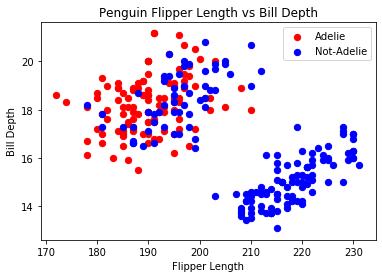

In [65]:

fig, ax = plt.subplots()
make_insects_scatter_plot(ax, 'specbin', 'Adelie', 'Not-Adelie')

In [66]:
ptrain['specbin'] = np.where(ptrain.loc[:, 'species']=='Gentoo', 1, 0)

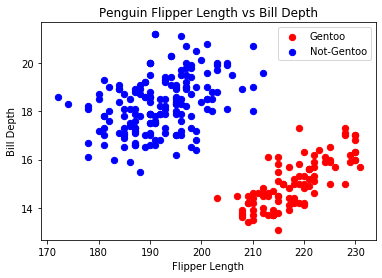

In [67]:
fig, ax = plt.subplots()
make_insects_scatter_plot(ax, 'specbin', 'Gentoo', 'Not-Gentoo')

#### We found it! If the penguin is Gentoo species it's different from non-Gentoos

In [44]:
ptrain

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sbin,specbin
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,0
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE,0,0
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE,0,0
...,...,...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,0,1
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,0,1
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,1,1
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,0,1


In [50]:
pl_m = smf.ols(formula='flipper_length_mm ~ C(island) + bill_length_mm +'
               'bill_depth_mm + body_mass_g + C(sex) +C(specbin)', data=ptrain).fit()

In [51]:
pl_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      flipper_length_mm   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          3.63e-114
Time:                        16:01:40   Log-Likelihood:                -810.68
No. Observations:                 267   AIC:                             1637.
Df Residuals:                     259   BIC:                             1666.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                135.8078      7.133     19.040      0.000     121.762     149.854
C(island)[T.Dream]         1.4943      1.133      1.319      0.188      -0.737       3.725
C(island)[T.Torgersen]     3.7158      1.294      2.871      0.004       1.167       6.264
C(sex)[T.MALE]             0.8637      1.010      0.855      0.393      -1.125       2.853
C(specbin)[T.1]           19.5325      2.473      7.898      0.000      14.663      24.402
bill_length_mm             0.4944      0.082      6.027      0.000       0.333       0.656
bill_depth_mm              0.6972      0.401      1.740      0.083      -0.092       1.486
body_mass_g                0.0055      0.001      5.218      0.000       0.003       0.008
==============================================================================
Omnibus:                        5.331   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                6.496
Skew:                          -0.154   Prob(JB):                       0.0389
Kurtosis:                       3.700   Cond. No.                     9.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
pl_m.params

Intercept                 135.807831
C(island)[T.Dream]          1.494319
C(island)[T.Torgersen]      3.715774
C(sex)[T.MALE]              0.863700
C(specbin)[T.1]            19.532541
bill_length_mm              0.494416
bill_depth_mm               0.697180
body_mass_g                 0.005514
dtype: float64

#### Add my new column to test data

In [54]:
ptest['specbin'] = np.where(ptest.loc[:, 'species']=='Gentoo', 1, 0)

In [68]:
pen_preds = pl_m.predict(ptest)

In [69]:
pen_preds

223    218.477864
14     201.279799
72     188.221765
319    211.736944
116    190.275465
          ...    
64     189.184378
187    192.471954
156    193.706016
105    198.735354
240    221.450547
Length: 66, dtype: float64

In [70]:
r2_score(ptest['flipper_length_mm'], pen_preds)

0.7748328036109031

In [71]:
mean_squared_error(ptest['flipper_length_mm'], pen_preds)

32.59119417395237

### Problem 3: Using data1.csv
A) do a train-test split of the data
B) Make a linear regression model of Y vs X
C) Compute the mean_squared_error and r2_score using the *test data* for your model

In [72]:
d1 = pd.read_csv('data1.csv')

In [73]:
d1.head()

,Unnamed: 0,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [74]:
d1 = d1.iloc[:,1:]

In [78]:
d1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [213]:
dtrain, dtest = sf.statsmodels_train_test_split(d1)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

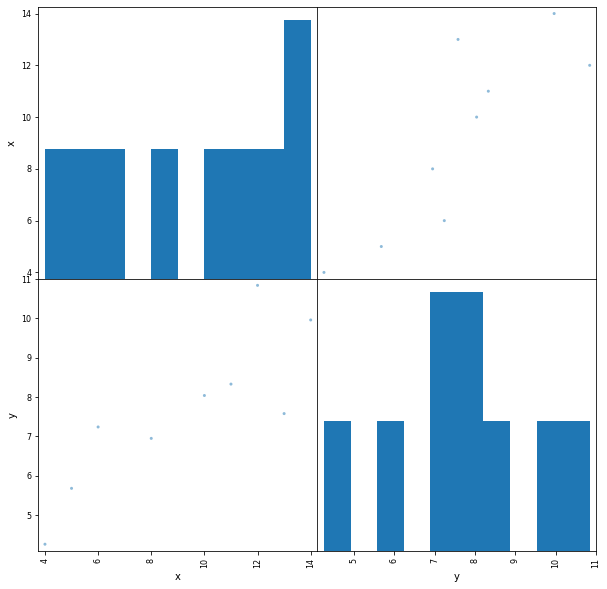

In [214]:
scatter_matrix(dtrain,figsize=[10,10]).show() ##x seems to be discrete

In [215]:
l_md1 = smf.ols(formula='y ~ x', data=dtrain).fit()

In [216]:
l_md1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 08 Sep 2020   Prob (F-statistic):            0.00397
Time:                        17:00:36   Log-Likelihood:                -12.818
No. Observations:                   9   AIC:                             29.64
Df Residuals:                       7   BIC:                             30.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3423      1.092      3.062      0.018       0.761       5.923
x              0.4675      0.111      4.213      0.004       0.205       0.730
==============================================================================
Omnibus:                        0.660   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.022
Skew:                           0.103   Prob(JB):                        0.989
Kurtosis:                       2.872   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
l_md1.params

Intercept    3.342284
x            0.467463
dtype: float64

In [218]:
d1preds = l_md1.predict(dtest)

In [219]:
r2_score(dtest['y'], d1preds)

0.3958198295118517

In [220]:
mean_squared_error(dtest['y'], d1preds)

2.4046521830470926

In [258]:
d2,d3, d4 = pd.read_csv('data2.csv'), pd.read_csv('data3.csv'), pd.read_csv('data4.csv')

In [259]:
d2,d3, d4 = d2.iloc[:,1:], d3.iloc[:,1:], d4.iloc[:,1:]

AttributeError: 'numpy.ndarray' object has no attribute 'show'

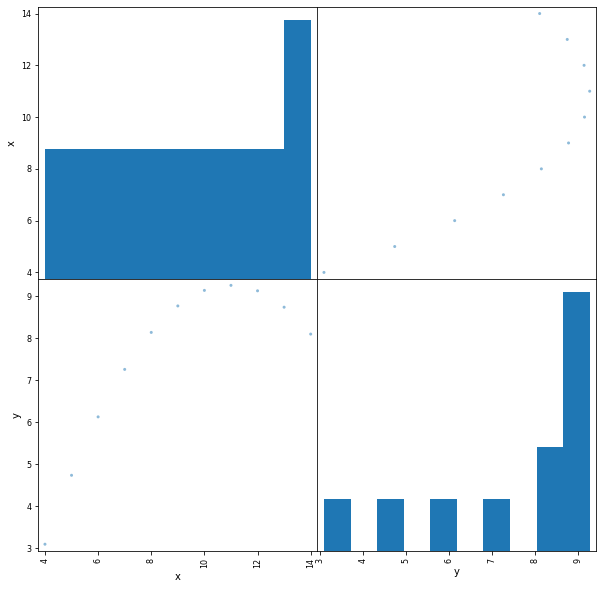

In [260]:
scatter_matrix(d2,figsize=[10,10]).show() ##x seems to be discrete

In [250]:
dtrain2, dtest2 = sf.statsmodels_train_test_split(d2)

In [251]:
dtrain3, dtest3 = sf.statsmodels_train_test_split(d3)

In [252]:
dtrain4, dtest4 = sf.statsmodels_train_test_split(d4)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

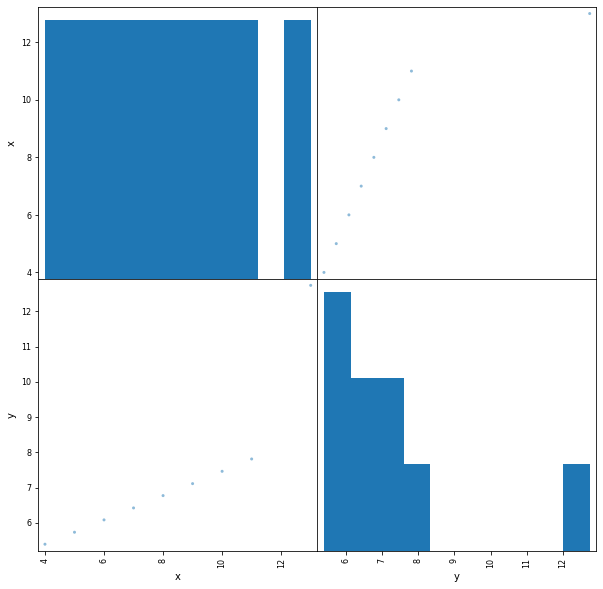

In [253]:
scatter_matrix(dtrain3,figsize=[10,10]).show() ##x seems to be discrete

AttributeError: 'numpy.ndarray' object has no attribute 'show'

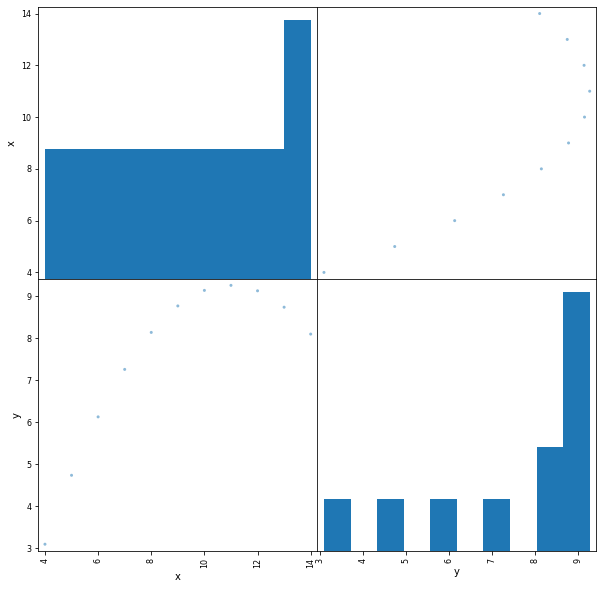

In [254]:
scatter_matrix(d2,figsize=[10,10]).show() ##x seems to be discrete

In [242]:
l_md2, l_md3, l_md4 = smf.ols(formula='y ~ x', data=dtrain2).fit(), \
    smf.ols(formula='y ~ x', data=dtrain3).fit(),smf.ols(formula='y ~ x', data=dtrain4).fit() 

In [243]:
l_md2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     18.05
Date:                Tue, 08 Sep 2020   Prob (F-statistic):            0.00380
Time:                        17:17:06   Log-Likelihood:                -13.833
No. Observations:                   9   AIC:                             31.67
Df Residuals:                       7   BIC:                             32.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4947      1.243      2.007      0.085      -0.444       5.434
x              0.5316      0.125      4.249      0.004       0.236       0.828
==============================================================================
Omnibus:                        0.993   Durbin-Watson:                   2.565
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.667
Skew:                          -0.277   Prob(JB):                        0.716
Kurtosis:                       1.787   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
l_md3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     10.90
Date:                Tue, 08 Sep 2020   Prob (F-statistic):             0.0131
Time:                        17:17:22   Log-Likelihood:                -14.649
No. Observations:                   9   AIC:                             33.30
Df Residuals:                       7   BIC:                             33.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7970      1.601      1.747      0.124      -0.988       6.582
x              0.5172      0.157      3.302      0.013       0.147       0.888
==============================================================================
Omnibus:                       15.526   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.995
Skew:                           1.822   Prob(JB):                       0.0303
Kurtosis:                       5.319   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
l_md4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     23.18
Date:                Tue, 08 Sep 2020   Prob (F-statistic):            0.00193
Time:                        17:17:24   Log-Likelihood:                -12.387
No. Observations:                   9   AIC:                             28.77
Df Residuals:                       7   BIC:                             29.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9158      1.032      2.826      0.026       0.476       5.356
x              0.5044      0.105      4.815      0.002       0.257       0.752
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.919   Jarque-Bera (JB):                0.305
Skew:                          -0.233   Prob(JB):                        0.859
Kurtosis:                       2.228   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
d2preds, d3preds, d4preds = l_md2.predict(dtest2), l_md3.predict(dtest3), l_md4.predict(dtest4)

In [255]:
r2_score(dtest2['y'], d2preds)

-1.1985462718121696

In [256]:
r2_score(dtest3['y'], d3preds)

-67.45657003237969

In [257]:
r2_score(dtest4['y'], d4preds)

-0.03361111111108883

# Appendix

### Problem 4: Using data3.csv
A) do a train-test split of the data
B) Make a linear regression model of Y vs X
C) Compute the mean_squared_error and r2_score using the *test data* for your model

### Problem 5: Using data4.csv
A) do a train-test split of the data
B) Make a linear regression model of Y vs X
C) Compute the mean_squared_error and r2_score using the *test data* for your model

In [82]:
filename = 'newyork.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           49 non-null     int64 
 1   Month          49 non-null     int64 
 2   Provider       49 non-null     object
 3   Location       49 non-null     object
 4   System ID      49 non-null     int64 
 5   # of Sessions  49 non-null     int64 
 6   # of Users     49 non-null     int64 
 7   # of Minutes   49 non-null     int64 
 8   MB Received    49 non-null     int64 
 9   MB Sent        49 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 4.0+ KB
None


,Year,Month,Provider,Location,System ID,# of Sessions,# of Users,# of Minutes,MB Received,MB Sent
0,2012,12,Van Wagner,30-94 Steinway St; Phone Kiosk; Astoria; NY,24336,168,80,15768,10747,788
1,2012,12,Van Wagner,Phone Kiosk near Burger King @ Richmond Ave & ...,24335,257,112,17733,6742,743
2,2012,12,Van Wagner,Phone Kiosk Fulton St & Albee Square; Brooklyn...,24334,254,189,24043,7376,412
3,2012,12,Van Wagner,Phone Kiosk @ Smith and Fulton St in Fulton M...,24332,0,0,0,0,0
4,2012,12,Van Wagner,Phone Kiosk W Bway & Spring St; Phone Kiosk; N...,24331,160,146,8350,2835,300


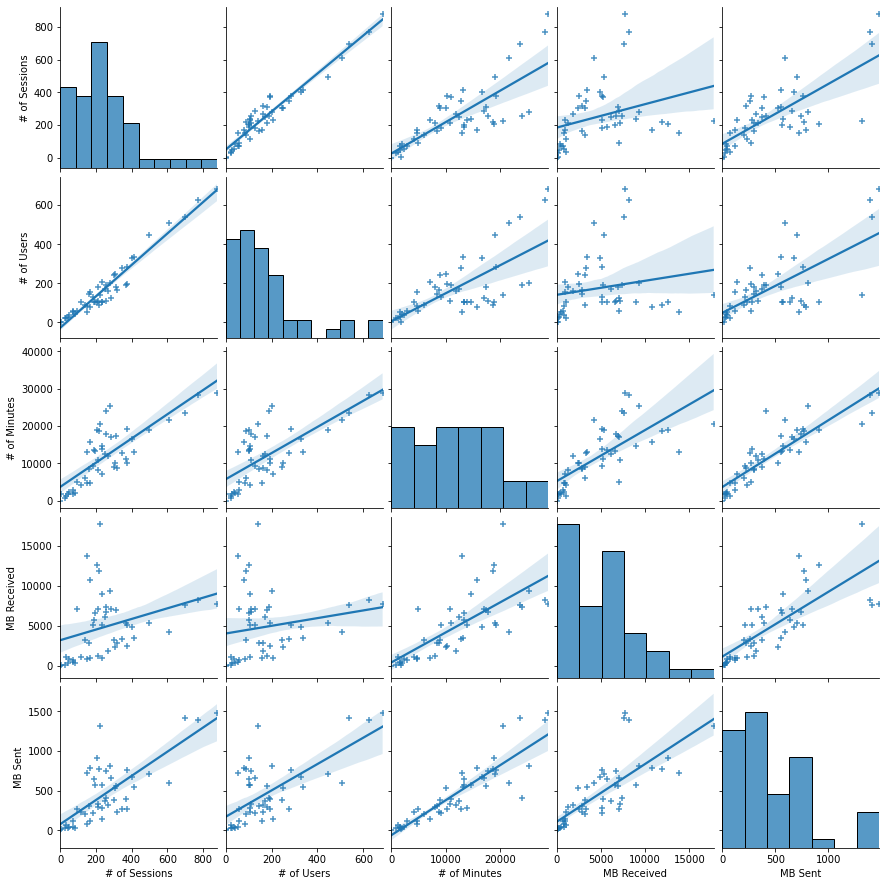

In [84]:
sns.pairplot(df[['# of Sessions', '# of Users','# of Minutes', 'MB Received', 'MB Sent' ]], kind='reg', markers='+') 

In [85]:
filename = 'admissions.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
admit,400.0,0.3175,0.466087,0.00,0.00,0.000,1.00,1.0
gre,400.0,587.7000,115.516536,220.00,520.00,580.000,660.00,800.0
gpa,400.0,3.3899,0.380567,2.26,3.13,3.395,3.67,4.0
rank,400.0,2.4850,0.944460,1.00,2.00,2.000,3.00,4.0


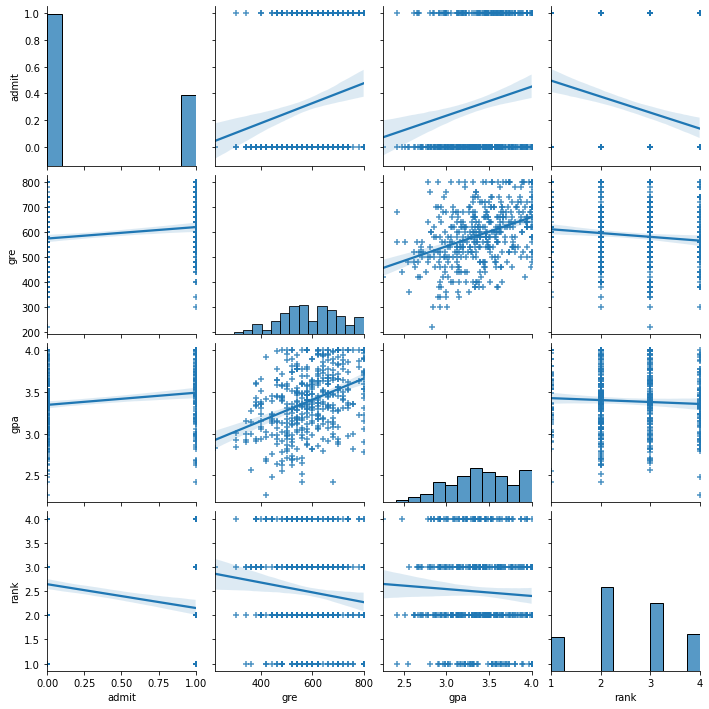

In [87]:
sns.pairplot(df, kind='reg', markers='+') 

In [89]:
filename = 'balance.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB
None


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,200.500000,115.614301,1.000,100.75000,200.5000,300.25000,400.000
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


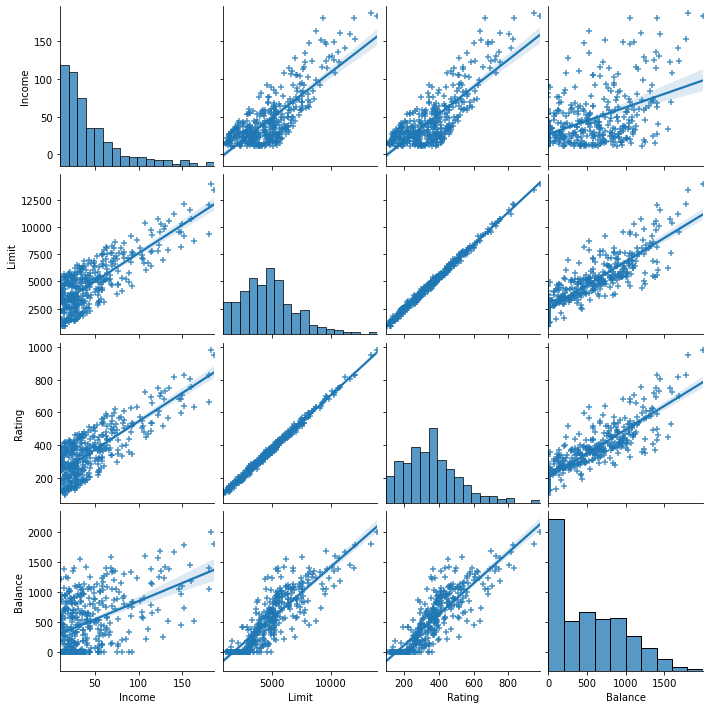

In [91]:
sns.pairplot(df[['Income', 'Limit','Rating', 'Balance']], kind='reg', markers='+') 

In [92]:
filename = 'chicago.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   MONTH                          31 non-null     object
 1   YEAR                           31 non-null     int64 
 2   NUMBER OF SESSIONS             31 non-null     int64 
 3   CUMULATIVE NUMBER OF SESSIONS  31 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None


,MONTH,YEAR,NUMBER OF SESSIONS,CUMULATIVE NUMBER OF SESSIONS
0,January,2011,22263,22263
1,February,2011,19657,41920
2,March,2011,24506,66426
3,April,2011,23998,90424
4,May,2011,23242,113666


In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,31.0,2011.838710,0.778750,2011.0,2011.0,2012.0,2012.0,2013.0
NUMBER OF SESSIONS,31.0,49945.483871,32908.622279,19657.0,32278.0,39164.0,52260.0,146590.0
CUMULATIVE NUMBER OF SESSIONS,31.0,562953.548387,422877.563576,22263.0,217736.0,479141.0,841745.5,1548310.0


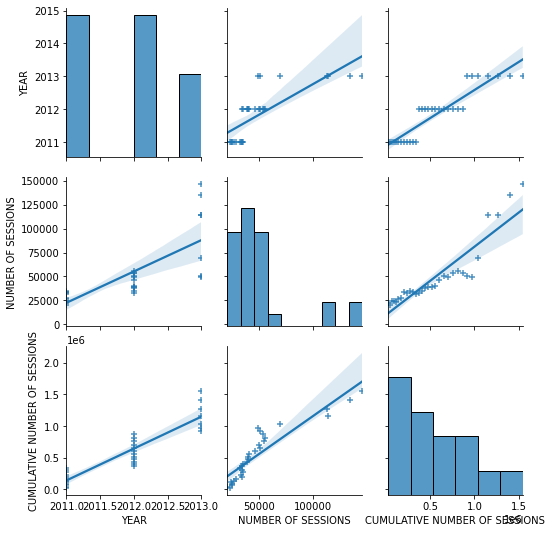

In [94]:
sns.pairplot(df, kind='reg', markers='+') 

In [95]:
filename = 'insects.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath, header=1, sep='\s+')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  42 non-null     int64  
 1   latitude   42 non-null     float64
 2   wingsize   42 non-null     int64  
 3   sex        42 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB
None


,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
continent,42.0,0.52381,0.505487,0.0,0.0,1.0,1.0,1.0
latitude,42.0,44.60000,5.637592,35.5,40.7,45.0,48.8,56.1
wingsize,42.0,864.52381,52.276581,789.0,812.5,872.0,914.5,944.0
sex,42.0,0.50000,0.506061,0.0,0.0,0.5,1.0,1.0


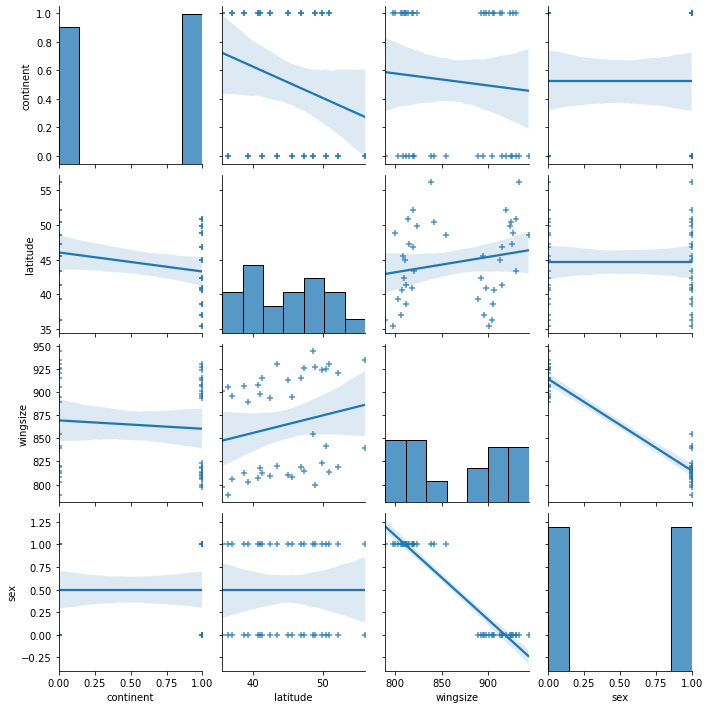

In [97]:
sns.pairplot(df, kind='reg', markers='+') 

In [98]:
filename = 'iris.csv'
path = os.path.join('..','data') 
filepath = os.path.join(path, filename)
df = pd.read_csv(filepath)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,74.500000,43.445368,0.0,37.25,74.50,111.75,149.0
sepal_length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


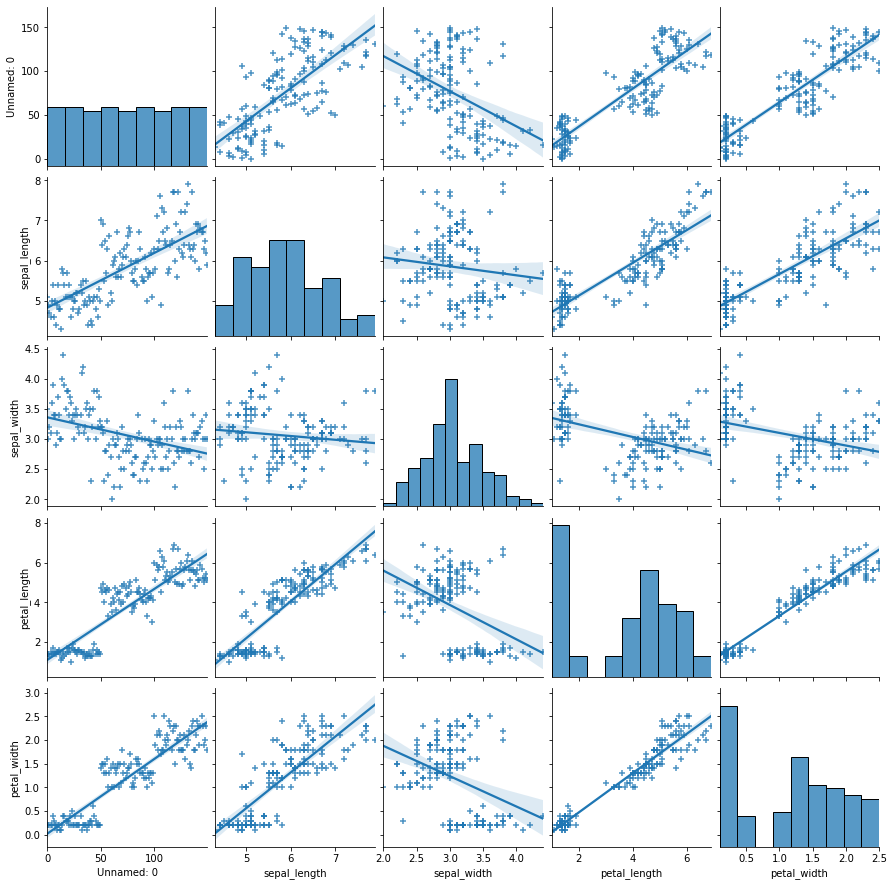

In [100]:
sns.pairplot(df, kind='reg', markers='+') 

In [76]:
df = sns.load_dataset('tips')
print(df.info(), '\n');
print(df.head(), '\n');

df.describe().T
df.to_csv('../data/tips.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None 

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 



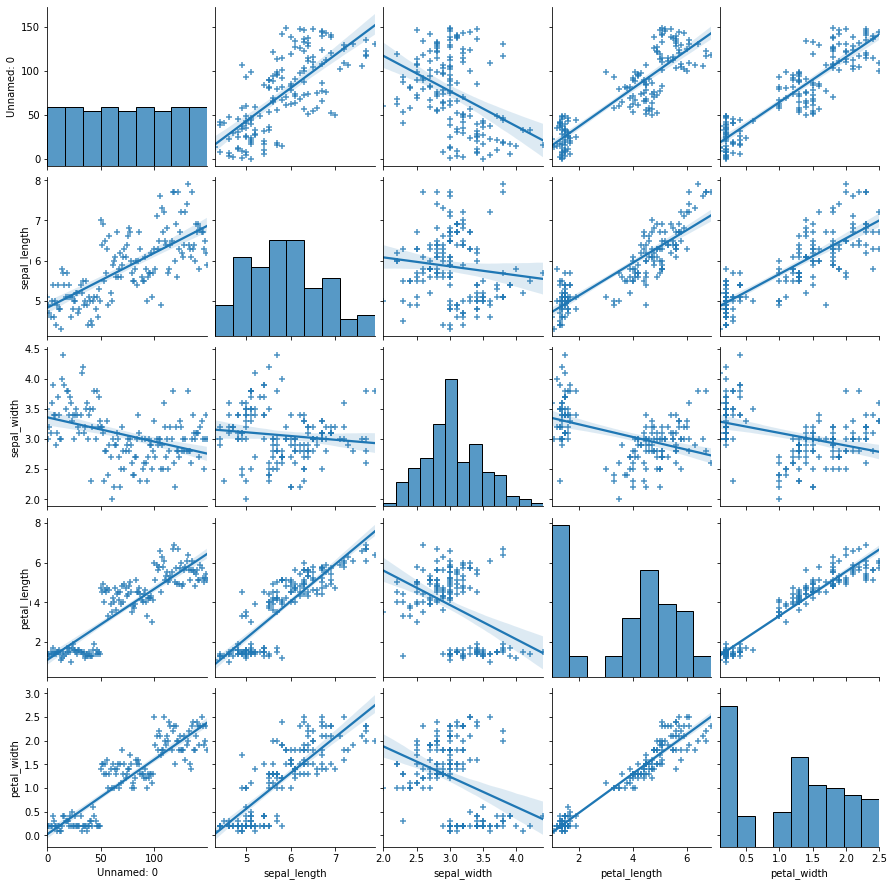

In [101]:
sns.pairplot(df, kind='reg', markers='+') 

In [75]:
df = sns.load_dataset('diamonds')
print(df.info(), '\n');
print(df.head(), '\n');

df.describe().T
df.to_csv('../data/diamonds.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None 

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.6

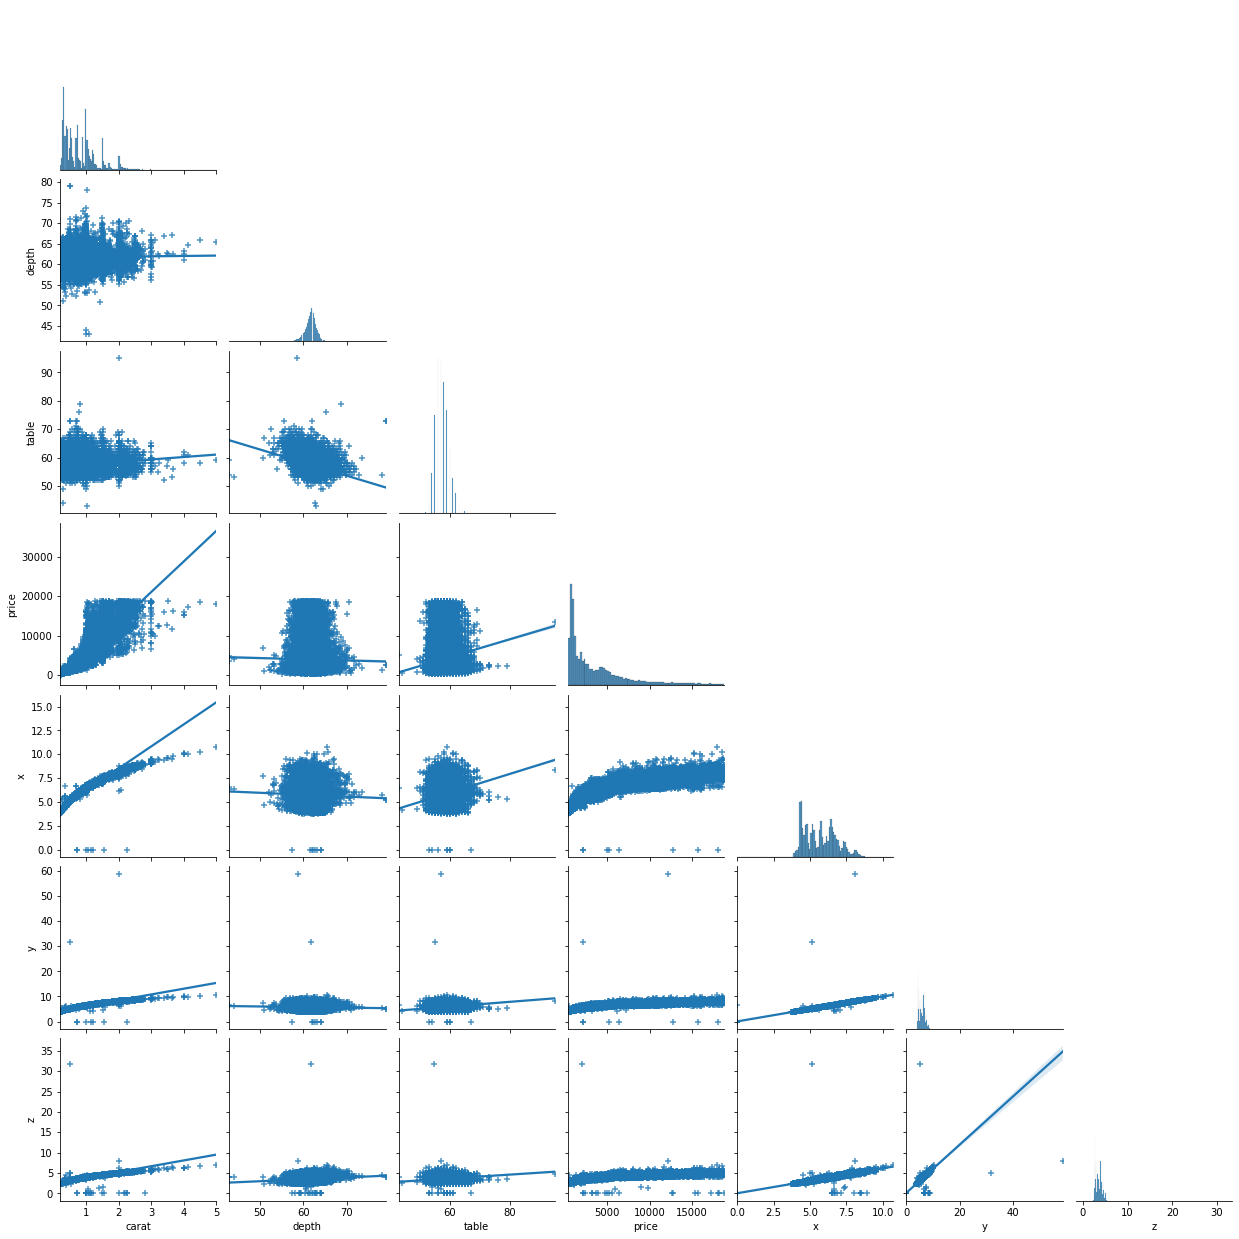

In [62]:
sns.pairplot(df, corner=True, kind='reg', markers='+') 

In [74]:
df = sns.load_dataset('geyser')
print(df.info(), '\n');
print(df.head(), '\n');

df.describe().T
df.to_csv('../data/geyser.csv', index=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB
None 

   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long 



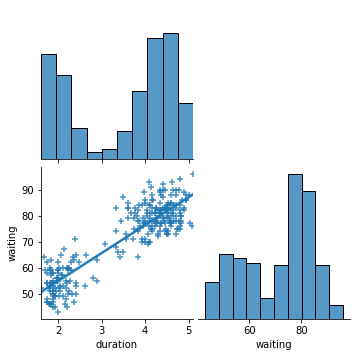

In [67]:
sns.pairplot(df, corner=True, kind='reg', markers='+') 